In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import random


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/face_dection/fer2013.csv/fer2013.csv')

In [ ]:
df.shape

(35887, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#df['pixels']=df['pixels'].str.split()

In [ ]:
'''
def Reshaping(arr):
  arr=np.array(arr)
  arr=arr.reshape((48,48,1))
  arr= arr.astype(np.uint8)
  return arr
'''


'\ndef Reshaping(arr):\n  arr=np.array(arr)\n  arr=arr.reshape((48,48,1))\n  arr= arr.astype(np.uint8)\n  return arr\n'

In [ ]:
data= df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
data= np.stack(data, axis=0)

In [ ]:
data[0].shape

(48, 48, 1)

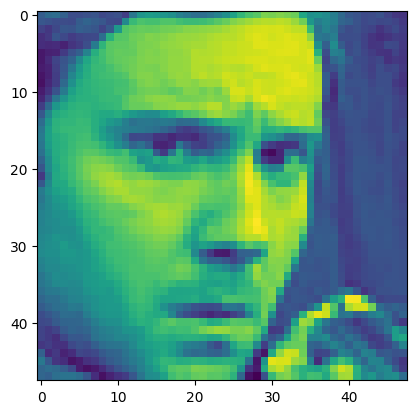

In [ ]:
plt.imshow(data[0])

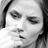

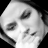

In [ ]:
from google.colab.patches import cv2_imshow

def rotate_images(image_list, angle):
    rotated_images = []
    for image in image_list:
        height, width = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1.0)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
        rotated_images.append(rotated_image)
    return rotated_images


new_data = rotate_images(data, random.randint(0, 91))

original_image = data[0]
rotated_image = new_data[0]

cv2_imshow( original_image)
cv2_imshow(rotated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
label_map = ['Fear', 'Happy', 'Sad', 'Neutral', 'Surprise','Anger', 'Disgust']

In [ ]:
df['emotion_name']=df['emotion'].apply(lambda x :label_map[x])

In [ ]:

df.head()

,emotion,pixels,Usage,emotion_name
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Fear
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Fear
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Sad
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Surprise
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Disgust


#Visualizing the face emotions

<Figure size 2000x2000 with 0 Axes>

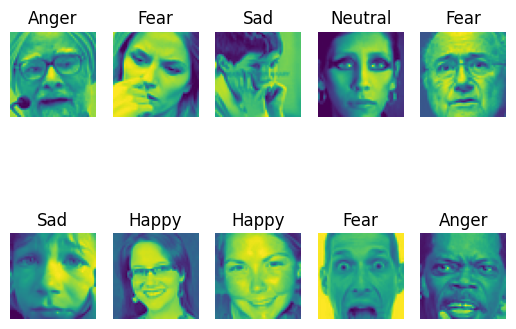

<Figure size 2000x2000 with 0 Axes>

In [ ]:
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(data[i])
  plt.title(df['emotion_name'][i])
  plt.axis('off')
plt.figure(figsize=(20,20))

In [ ]:
df['emotion_name'].value_counts()

Neutral     8989
Disgust     6198
Surprise    6077
Sad         5121
Fear        4953
Anger       4002
Happy        547
Name: emotion_name, dtype: int64

In [ ]:
filter=(df['emotion_name']=='Disgust')| (df['emotion_name']=='Surprise' )| (df['emotion_name']=='Anger')
df=df.loc[-filter,['emotion_name','pixels','emotion']]

In [ ]:
df['emotion_name'].value_counts()

Neutral    8989
Sad        5121
Fear       4953
Happy       547
Name: emotion_name, dtype: int64

In [ ]:
df.head()

,emotion_name,pixels,emotion
0,Fear,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,Fear,151 150 147 155 148 133 111 140 170 174 182 15...,0
2,Sad,231 212 156 164 174 138 161 173 182 200 106 38...,2
5,Sad,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,2
7,Neutral,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,3


In [ ]:
data= df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
data= np.stack(data, axis=0)

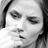

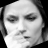

In [ ]:
from google.colab.patches import cv2_imshow

def rotate_images(image_list, angle):
    rotated_images = []
    for image in image_list:
        #image = np.stack((image, image,image), axis=-1)
        height, width = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1.0)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
        rotated_images.append(rotated_image)
    return rotated_images


new_data = rotate_images(data, random.randint(0, 361))

original_image = data[0]
rotated_image = new_data[0]

cv2_imshow( original_image)
cv2_imshow(rotated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df['emotion'],test_size=0.2,shuffle=True,random_state=42)

In [ ]:
x_train[0]

array([[[ 76.],
        [ 93.],
        [119.],
        ...,
        [254.],
        [255.],
        [255.]],

       [[ 86.],
        [112.],
        [129.],
        ...,
        [254.],
        [255.],
        [255.]],

       [[ 99.],
        [134.],
        [134.],
        ...,
        [255.],
        [255.],
        [255.]],

       ...,

       [[135.],
        [149.],
        [156.],
        ...,
        [255.],
        [249.],
        [253.]],

       [[126.],
        [137.],
        [151.],
        ...,
        [255.],
        [251.],
        [253.]],

       [[122.],
        [129.],
        [139.],
        ...,
        [254.],
        [251.],
        [254.]]], dtype=float32)

In [ ]:
x_train[0].shape

(48, 48, 1)

In [ ]:
stop

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(2,2),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=7,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
earlystopping=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_accuracy')

In [ ]:
y_train[:100]

28839    2
26111    6
1146     3
1179     6
12410    3
        ..
21296    4
11287    3
15165    3
35585    2
1814     2
Name: emotion, Length: 100, dtype: int64

In [ ]:
def lr_schedule(epoch):

    initial_lr = 0.001  # Initial learning rate
    if epoch < 15:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(0.1 * (5 - epoch))

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift the width of the image
    height_shift_range=0.2,   # Randomly shift the height of the image
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Randomly zoom into or out of the image
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=False,      # Do not flip images vertically
    fill_mode='nearest'       # Fill in missing pixels using the nearest pixel
)

datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test),callbacks=[earlystopping])

Epoch 1/50
380/380 [==============================] - 26s 58ms/step - loss: 1.6874 - accuracy: 0.2675 - val_loss: 1.5514 - val_accuracy: 0.3001
Epoch 2/50
380/380 [==============================] - 20s 53ms/step - loss: 1.5674 - accuracy: 0.2937 - val_loss: 1.5488 - val_accuracy: 0.2993
Epoch 3/50
380/380 [==============================] - 21s 55ms/step - loss: 1.5588 - accuracy: 0.2937 - val_loss: 1.5463 - val_accuracy: 0.3013
Epoch 4/50
380/380 [==============================] - 20s 53ms/step - loss: 1.5549 - accuracy: 0.2943 - val_loss: 1.5324 - val_accuracy: 0.3027
Epoch 5/50
380/380 [==============================] - 20s 53ms/step - loss: 1.5486 - accuracy: 0.3002 - val_loss: 1.5440 - val_accuracy: 0.3009
Epoch 6/50
380/380 [==============================] - 21s 55ms/step - loss: 1.5472 - accuracy: 0.3012 - val_loss: 1.5564 - val_accuracy: 0.2962
Epoch 7/50
380/380 [==============================] - 20s 53ms/step - loss: 1.5429 - accuracy: 0.3024 - val_loss: 1.5419 - val_accuracy:

In [ ]:
model.save("/content/drive/MyDrive/face_dection/emtion_detector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
label_map = ['Fear', 'Happy', 'Sad', 'Neutral', 'Sad', 'Surprise', 'Neutral']

In [ ]:
y_pred=model.predict(x_test)

190/190 [==============================] - 1s 4ms/step


Text(0.5, 0.98, 'Predicted Emotions')

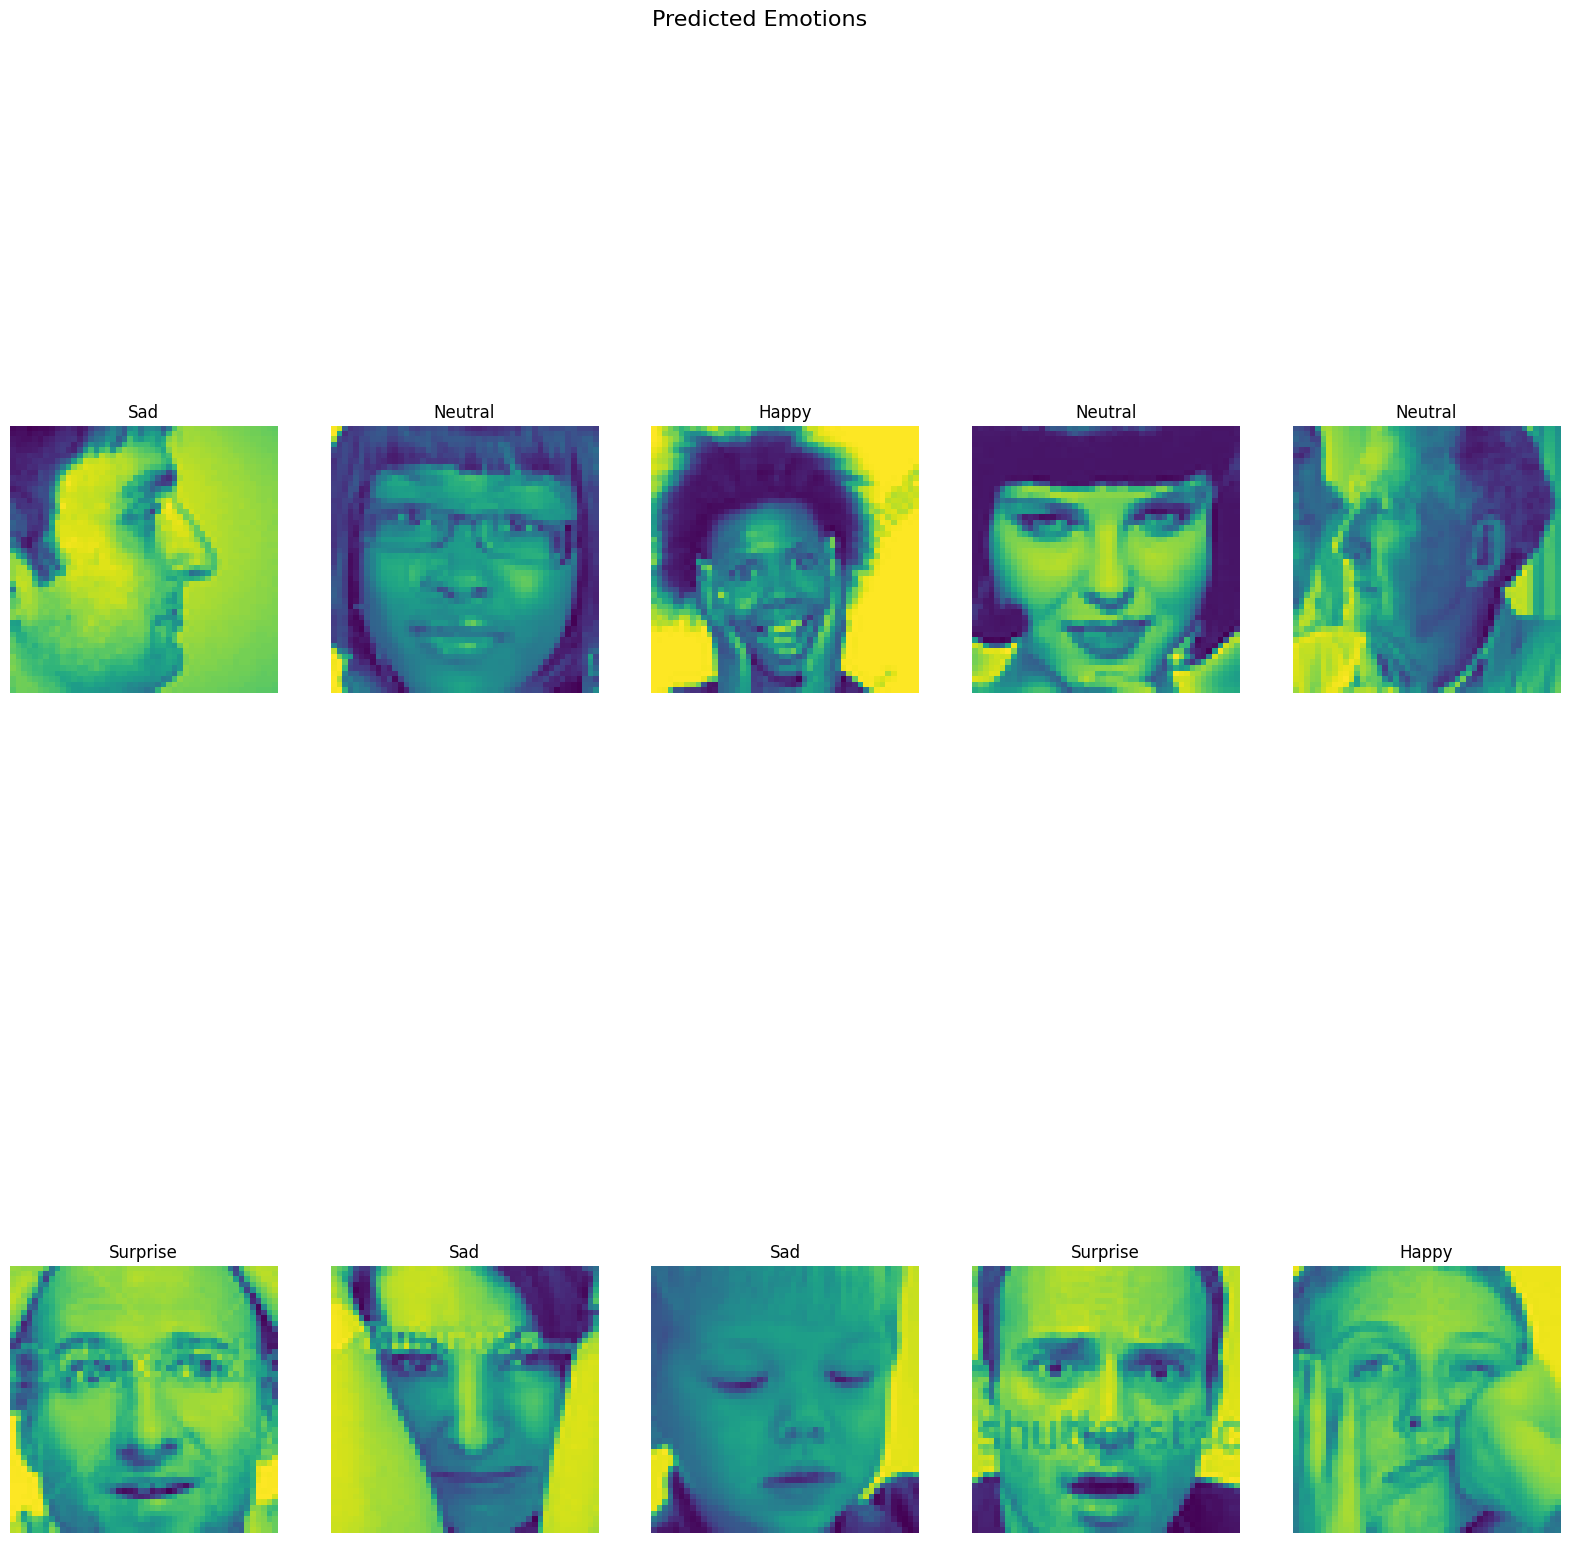

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_test[i+100])
  plt.title(label_map[y_pred[i+100].argmax()])
  plt.axis('off')
fig.suptitle("Predicted Emotions",fontsize=16)



#Trying Fine tunning using Image V net pre build model

In [ ]:
images=[]
for image in data:
  image = np.stack((image, image,image), axis=-1)
  images.append(image)

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import convnext
from tensorflow.keras.layers import Input, Lambda

# Create a function to convert grayscale to RGB
def grayscale_to_rgb(x):
    x = keras.layers.Concatenate()([x, x, x])
    return x

# Define the input shape for grayscale images
input_shape = (48, 48, 1)  # Grayscale image input shape

# Create a Lambda layer to apply the grayscale to RGB conversion
input_layer = Input(shape=input_shape)
rgb_input = Lambda(grayscale_to_rgb)(input_layer)

# Load MobileNetV2 with the modified input shape
base_model = convnext.ConvNeXtLarge(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Connect the RGB input to the base model
x = base_model(rgb_input)

# Add GlobalAveragePooling2D and Dense layers for classification
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(units=4, activation='softmax')(x)

# Create the final model with the input and output tensors
model = keras.models.Model(inputs=input_layer, outputs=predictions)
earlystopping=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_accuracy')
# Compile and train your model with x_train and y_train
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, y_test),callbacks=[earlystopping])
#model.fit(x_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
491/491 [==============================] - 79s 125ms/step - loss: 1.1024 - accuracy: 0.5317 - val_loss: 0.9150 - val_accuracy: 0.6219
Epoch 2/50
491/491 [==============================] - 50s 102ms/step - loss: 1.0209 - accuracy: 0.5625 - val_loss: 0.8651 - val_accuracy: 0.6377
Epoch 3/50
491/491 [==============================] - 50s 102ms/step - loss: 0.9867 - accuracy: 0.5773 - val_loss: 0.8136 - val_accuracy: 0.6708
Epoch 4/50
491/491 [==============================] - 50s 101ms/step - loss: 0.9839 - accuracy: 0.5785 - val_loss: 0.8176 - val_accuracy: 0.6655
Epoch 5/50
491/491 [==============================] - 50s 102ms/step - loss: 0.9864 - accuracy: 0.5818 - val_loss: 0.8319 - val_accuracy: 0.6662
Epoch 6/50
491/491 [==============================] - 49s 101ms/step - loss: 0.9776 - accuracy: 0.5852 - val_loss: 0.8561 - val_accuracy: 0.6395
Epoch 7/50
491/491 [==============================] - 49s 100ms/step - loss: 0.9682 - accuracy: 0.5876 - val_loss: 0.8098 - val_ac

In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    # Resize the image to (48, 48)
    image = image.resize((48, 48))
    # Convert to a NumPy array and normalize
    image_array = np.array(image) / 255.0
    # Add a batch dimension (1 image)
    image_array = np.expand_dims(image_array, axis=0)
    return image_array
# Preprocess the custom image
a='/content/drive/MyDrive/Photo_Train/Paritosh.jpg'
custom_image = preprocess_image(a)

# Make predictions
predictions = model.predict(custom_image)

# The 'predictions' variable will contain the predicted class probabilities.
# You can use numpy.argmax to get the predicted class label.
predicted_class = np.argmax(predictions)




1/1 [==============================] - 0s 69ms/step


In [ ]:
label_map

['Fear', 'Happy', 'Sad', 'Neutral', 'Sad', 'Surprise', 'Neutral']

In [ ]:
predicted_class

3

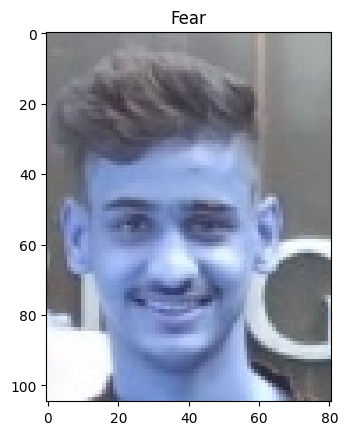

In [ ]:
plt.title(label_map[predicted_class])
image=cv2.imread(a)
plt.imshow(image)

In [ ]:
x_train[0].shape

(48, 48, 1)

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

123/123 [==============================] - 10s 80ms/step - loss: 0.7973 - accuracy: 0.6752


In [ ]:
model.save('/content/drive/MyDrive/face_dection/High_accuracy_emotion_detection.h5')

In [ ]:
x_test_images=[]
for image in x_test:
  image=image.reshape(1,48,48)
  x_test_images.append(image)


In [ ]:
x_test_images=np.array(x_test_images)

In [ ]:
x_test[0].shape

(48, 48, 1)

NameError: ignored

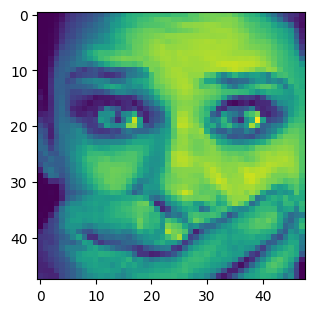

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_test[i+100])
  plt.title(label_map[y_pred[i+100].argmax()])
  plt.axis('off')
fig.suptitle("Predicted Emotions",fontsize=16)